In [1]:
import process_data
import utils
import numpy as np
import eval
import data
import model
import torch
import modernUnet
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import random_split

In [2]:
trans = data.getGTAtransform((256,512))
fmnist = torchvision.datasets.CIFAR100(root='./data',transform=trans,  download=True)

Files already downloaded and verified


In [3]:


generator1 = torch.Generator().manual_seed(2147483647)
fmnist_big, fmnist_small = random_split(fmnist, [0.99,0.01], generator=generator1)
len(fmnist_small)

500

In [4]:
fmnist[0][0].size()

torch.Size([3, 256, 512])

In [5]:
gta_root = 'E:/GTA5'

train_set, val_set = data.loadData(root="E:/CityScapes", subsize=(256,512), flip=False ,verbose=True)
#train_set, val_set = data.loadGTAData(root=gta_root, subsize=(256,512),verbose=True)

train_dl, val_dl = data.getDataLoader(train_set=train_set, val_set=val_set, batch_size=8)

#model = model.Model()
model = modernUnet.MUN(ODD=True)
model.load_state_dict(torch.load('../Trained_models/modernUnet-PT-best.pth'))
#model.load_state_dict(torch.load('./model_best.pth'))



#eval.single_IOU(target, prediction)

Size of the training set: 2380
Size of the validation set: 595


<All keys matched successfully>

In [6]:
def threshold_finding(dataset, model):
    model.eval()
    cls_outputs = []
    for i in range(len(dataset)):
        input = dataset[i][0].unsqueeze(0).float().to('cuda')
        _, cls_output = model(input)
        cls_outputs.append(cls_output)
        print(f"[{i}/{len(dataset)}]: {cls_output}")
    
    return cls_outputs

cls_outputs_cifar = threshold_finding(fmnist_small, model.cuda())
cls_outputs_CS = threshold_finding(val_set, model.cuda())


[0/500]: 0.0001716849801596254
[1/500]: 0.0002581088338047266
[2/500]: 0.00041420201887376606
[3/500]: 6.092196053941734e-05
[4/500]: 0.0004553443577606231
[5/500]: 0.00023538533423561603
[6/500]: 6.095556091167964e-05
[7/500]: 2.7950756702921353e-05
[8/500]: 8.206643542507663e-06
[9/500]: 0.00017473877232987434
[10/500]: 0.0006424999446608126
[11/500]: 2.760889401542954e-05
[12/500]: 0.000142097647767514
[13/500]: 8.50165233714506e-05
[14/500]: 9.82702913461253e-05
[15/500]: 7.465740782208741e-05
[16/500]: 9.080784366233274e-05
[17/500]: 1.535955561848823e-05
[18/500]: 1.6676025552442297e-05
[19/500]: 0.00013183739793021232
[20/500]: 4.1909825085895136e-05
[21/500]: 4.5699980546487495e-05
[22/500]: 0.00013680457777809352
[23/500]: 1.4589268175768666e-05
[24/500]: 5.821425475005526e-06
[25/500]: 3.118282984360121e-05
[26/500]: 0.00011815048492280766
[27/500]: 4.352148243924603e-05
[28/500]: 6.91167515469715e-05
[29/500]: 6.911712262080982e-05
[30/500]: 1.096207051887177e-05
[31/500]: 2

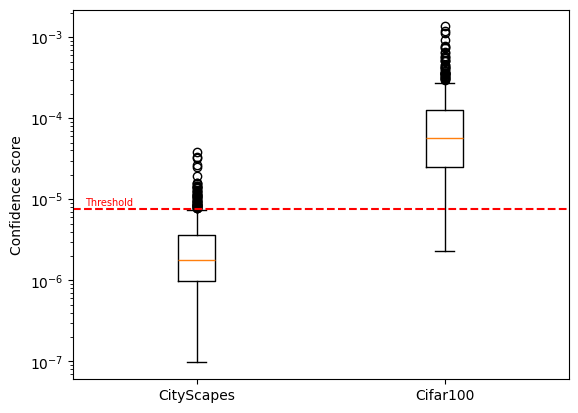

In [21]:
plt.boxplot([cls_outputs_CS, cls_outputs_cifar])
plt.yscale('log')
#plt.ylim(0, 0.000025)
plt.axhline(y=7.5e-6, color='r', linestyle='--')
plt.text(0.55, 9e-6, 'Threshold', color='r', fontsize=7, ha='left', va='center')
plt.xticks([1, 2], ['CityScapes', 'Cifar100'])
plt.ylabel('Confidence score')
plt.show()

In [ ]:
threshold = 7.5e-6
threshold

In [ ]:

output, cls = model(val_set[3][0].unsqueeze(0).float().to('cuda'))
m = torch.nn.Softmax(dim=1)
mm = m(output)
values, _ = torch.median(mm, dim=1)
torch.mean(values)

In [ ]:
output.size()

In [ ]:
torch.mean(mm)

In [ ]:
mm.size()

In [ ]:
plt.boxplot(array)
plt.show()

In [ ]:
image, target = eval.getRandomImageAndTarget(val_set)
prediction = eval.predict(image, model.cuda(),'cuda', (256,512))
eval.showImageTargetAndPrediction(image, target, prediction)
eval.showPixelValues(image)